# Importing Libraries

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
from collections import Counter

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from datetime import datetime, timedelta

from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Set Options

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Read data

In [3]:
# read the excel data file 
df = pd.read_excel('train_fashion.xlsx')

# display the top 5 rows of the dataframe
df.head()

# Note: To display more rows, example 10, use head(10)

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


# Understand Data

In [4]:
# checking shape of the dataset
df.shape

(75000, 14)

In [5]:
# info gives us the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_Ref_Number            75000 non-null  int64  
 1   Order_Placed_AT             75000 non-null  object 
 2   Order_Delivered_Date        67979 non-null  object 
 3   Product_Ref_ID              75000 non-null  int64  
 4   Size                        75000 non-null  object 
 5   Color_Code                  75000 non-null  object 
 6   Product_Category_Reference  75000 non-null  int64  
 7   Cost_to_Customer(USD)       75000 non-null  float64
 8   Customer_ID                 75000 non-null  int64  
 9   Gender                      75000 non-null  object 
 10  Customer_BirthDate          68445 non-null  object 
 11  Customer_Location           75000 non-null  object 
 12  Customer_Joining_Date       75000 non-null  object 
 13  Order_Repeat_Chance         750

# EDA

In [6]:
# checking datatypes, no. of unique values, and missing values in the dataset
# created a new dataframe and watching above all in the same frame
detail = pd.concat([df.dtypes, df.nunique(), df.isnull().sum()], axis = 1)
detail.columns = ['Data types', 'Unique Values', 'Null Values']
detail

,Data types,Unique Values,Null Values
Order_Ref_Number,int64,75000,0
Order_Placed_AT,object,82,0
Order_Delivered_Date,object,121,7021
Product_Ref_ID,int64,1897,0
Size,object,99,0
Color_Code,object,77,0
Product_Category_Reference,int64,133,0
Cost_to_Customer(USD),float64,247,0
Customer_ID,int64,18017,0
Gender,object,5,0


In [7]:
# checking unique values for every columns with for loop
for i in df.columns:
    print(i)
    print(df[i].unique(), '\n\n\n')

Order_Ref_Number
[98981 69825  9929 ... 76821   861 15796] 



Order_Placed_AT
['2016-09-10' '2016-08-15' '2016-06-27' '2016-08-21' '2016-09-06'
 '2016-08-25' '2016-08-23' '2016-06-29' '2016-08-24' '2016-08-27'
 '2016-08-01' '2016-09-08' '2016-07-06' '2016-06-24' '2016-08-03'
 '2016-06-23' '2016-06-26' '2016-07-27' '2016-07-02' '2016-08-14'
 '2016-08-06' '2016-07-14' '2016-09-04' '2016-07-22' '2016-08-18'
 '2016-06-28' '2016-08-28' '2016-07-03' '2016-08-19' '2016-07-12'
 '2016-08-09' '2016-08-20' '2016-08-02' '2016-08-29' '2016-08-13'
 '2016-08-26' '2016-07-20' '2016-07-10' '2016-07-28' '2016-07-21'
 '2016-09-07' '2016-09-11' '2016-07-08' '2016-08-30' '2016-08-22'
 '2016-08-16' '2016-07-01' '2016-07-04' '2016-08-12' '2016-07-23'
 '2016-09-05' '2016-07-11' '2016-08-08' '2016-08-05' '2016-08-17'
 '2016-09-02' '2016-09-03' '2016-08-31' '2016-06-30' '2016-08-11'
 '2016-08-07' '2016-07-30' '2016-07-07' '2016-09-09' '2016-07-15'
 '2016-08-10' '2016-07-05' '2016-08-04' '2016-07-13' '2016-06-2

#### Let us remove the Id column as this will not be necessary for our analysis

In [8]:
# dropping id as unique feature
df.drop(['Order_Ref_Number', 'Customer_ID'], axis=1, inplace=True)

**1. For numerical variables, use the describe()**

In [9]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Ref_ID,75000.0,924.275213,702.739285,1.0,214.0,812.0,1582.0,2241.0
Product_Category_Reference,75000.0,30.173093,28.190524,1.0,5.0,25.0,44.0,138.0
Cost_to_Customer(USD),75000.0,65.232934,48.291431,0.0,29.9,49.9,79.9,999.0
Order_Repeat_Chance,75000.0,0.459933,0.498395,0.0,0.0,0.0,1.0,1.0


**2. For categorical variables, use the describe(include = 'object')**

In [10]:
# summary of categorical variables
df.describe(include=object).T
# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

,count,unique,top,freq
Order_Placed_AT,75000,82,2016-06-27,4190
Order_Delivered_Date,67979,121,2016-07-03,3801
Size,75000,99,l,9233
Color_Code,75000,77,black,14055
Gender,75000,5,Mrs,71614
Customer_BirthDate,68445,8927,1900-11-21,709
Customer_Location,75000,16,North Rhine-Westphalia,17083
Customer_Joining_Date,75000,572,2015-02-17,25443


# Separating Categorical and Numerical Variable

In [11]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_num = df.select_dtypes(np.number)

# display the numeric features
df_num.columns

Index(['Product_Ref_ID', 'Product_Category_Reference', 'Cost_to_Customer(USD)',
       'Order_Repeat_Chance'],
      dtype='object')

In [12]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_cat = df.select_dtypes('object')

# display the numeric features
df_cat.columns

Index(['Order_Placed_AT', 'Order_Delivered_Date', 'Size', 'Color_Code',
       'Gender', 'Customer_BirthDate', 'Customer_Location',
       'Customer_Joining_Date'],
      dtype='object')

# Visualization


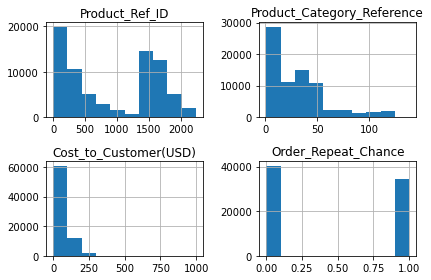

In [13]:
# Checking histogram of all the numeric variable
df_num.hist()
plt.tight_layout()
plt.show()

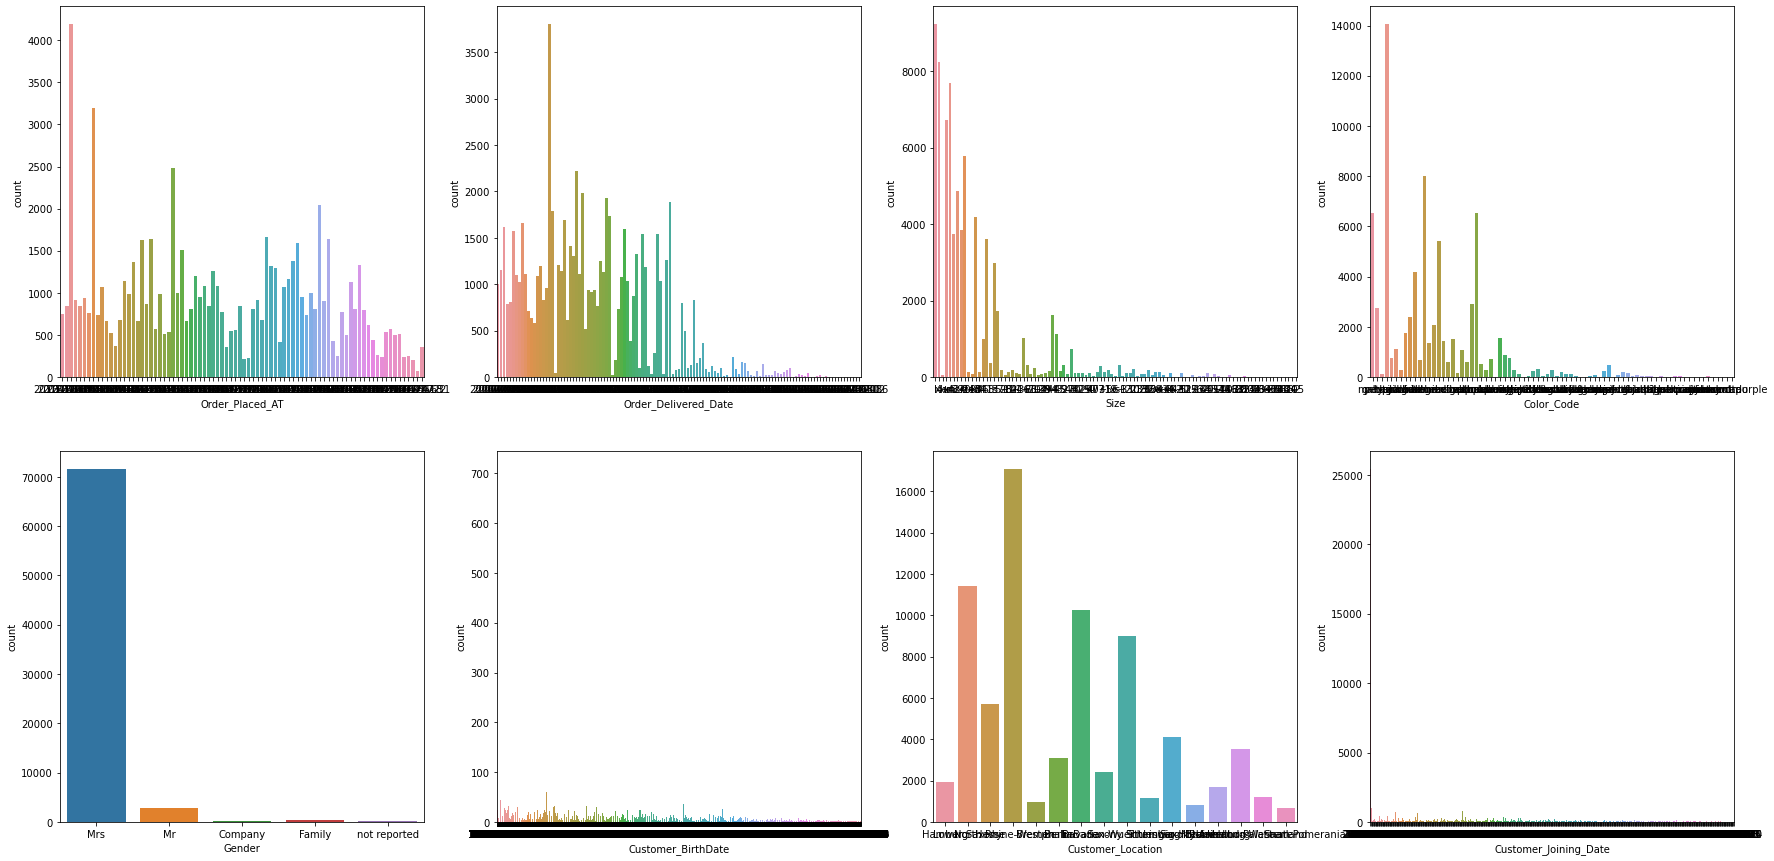

In [14]:
# visualizing the categorical variable
categorical = df_cat.columns

fig, ax = plt.subplots(2,4, figsize = (30,15))

for i, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[i], ax = subplot)
plt.show()

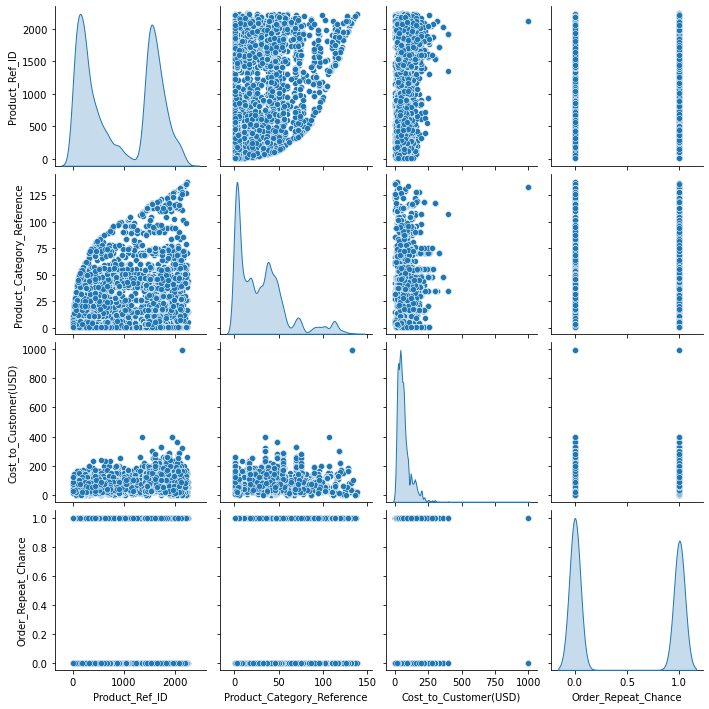

In [15]:
# plotting a pairplot 
column = df[df_num.columns]
sns.pairplot(column, kind = 'scatter', diag_kind = 'kde')
plt.show()

# Some Feature Engineering

In [16]:
# checking unique values of Color_Code
df['Color_Code'].unique()

array(['grey', 'petrol', 'mahagoni', 'black', 'pink', 'stained', 'pallid',
       'ocher', 'white', 'green', 'orange', 'blue', 'denim', 'anthracite',
       'red', 'mocca', 'beige', 'olive', 'coral', 'ash', 'nature',
       'purple', 'brown', 'bordeaux', 'aquamarine', 'turquoise', 'ebony',
       'berry', 'aubergine', 'dark denim', 'khaki', 'striped', 'amethyst',
       'dark oliv', 'yellow', 'azure', 'mango', 'hibiscus', 'basalt',
       'cobalt blue', 'curry', 'ancient', 'mint', 'dark grey', 'habana',
       'dark garnet', 'darkblue', 'fuchsia', 'curled', 'navy', 'magenta',
       'apricot', 'silver', 'ecru', 'blau', 'gold', 'floral', 'jade',
       'aqua', '?', 'kanel', 'cognac', 'antique pink', 'copper coin',
       'dark navy', 'champagner', 'baltic blue', 'creme', 'opal',
       'caramel', 'aviator', 'ivory', 'almond', 'terracotta', 'brwon',
       'avocado', 'currant purple'], dtype=object)

In [17]:
# we found '?' in the unique values
# we are replacing it with the mode values
df['Color_Code'] = df['Color_Code'].replace('?', df['Color_Code'].mode()[0])

**Converting dates feature into datetime datatype**

In [18]:
# converting features into datetime feature
df['Order_Placed_AT'] = pd.to_datetime(df['Order_Placed_AT'])

df['Order_Delivered_Date'] = pd.to_datetime(df['Order_Delivered_Date'])

df['Customer_BirthDate'] = pd.to_datetime(df['Customer_BirthDate'])

**We are creating a new feature from Order_Place_Date and Order_Delivery_Date**

**Created a new Feature named - Days_Between_Placed_Deliver**

In [19]:
# Creating a new feature
df['Days_Between_Placed_Deliver'] = (df['Order_Delivered_Date'] - df['Order_Placed_AT'])
df['Days_Between_Placed_Deliver'] = df['Days_Between_Placed_Deliver']/np.timedelta64(1, 'D')
df['Days_Between_Placed_Deliver'].head()

0    1.0
1    5.0
2    5.0
3    1.0
4    1.0
Name: Days_Between_Placed_Deliver, dtype: float64

In [20]:
# Checking top 5 values of new feature
df['Days_Between_Placed_Deliver'].head()

0    1.0
1    5.0
2    5.0
3    1.0
4    1.0
Name: Days_Between_Placed_Deliver, dtype: float64

In [21]:
# As we checked in the new feature, there are negative values 
# so just making that negative values as 0
df['Days_Between_Placed_Deliver'] = df['Days_Between_Placed_Deliver'].apply(lambda x : 0 if x < 0 else x)

In [22]:
# handling missing values
# filled 0
df['Days_Between_Placed_Deliver'] = df['Days_Between_Placed_Deliver'].fillna(0)

In [23]:
df.shape

(75000, 13)

# New feature - Days Between Order and Delivered

**Introducing one new feature as days taken to deliver a product**

In [24]:
df['Days_Between_Placed_Deliver'].isnull().sum()

0

**As we extracted a new feature then we dont need date of order placed and date of order delivered**

In [25]:
df = df.drop(['Order_Delivered_Date', 'Order_Placed_AT'], axis = 1)

# New Feature - Age

**We can Extract age form Birthdate**

In [26]:
df['Customer_BirthDate'] = df['Customer_BirthDate'].fillna(df['Customer_BirthDate'].mode()[0])

In [27]:
df['Customer_BirthDate'] = df['Customer_BirthDate'].apply(lambda x : str(x).split('-')[0]).astype(int)

**Now Just subtract this year from current Year**

In [28]:
df['Customer_age'] = 2020 - df['Customer_BirthDate']

In [29]:
df.isnull().sum()

Product_Ref_ID                 0
Size                           0
Color_Code                     0
Product_Category_Reference     0
Cost_to_Customer(USD)          0
Gender                         0
Customer_BirthDate             0
Customer_Location              0
Customer_Joining_Date          0
Order_Repeat_Chance            0
Days_Between_Placed_Deliver    0
Customer_age                   0
dtype: int64

**As we extracted a new feature then we dont need date of order placed and date of order delivered**

In [30]:
df = df.drop(['Customer_BirthDate'], axis = 1)

# New Feature - Membership_since(Years)

In [31]:
df['Customer_Joining_Date'] = pd.to_datetime(df['Customer_Joining_Date'])

In [32]:
now = pd.to_datetime('2020-01-30')
now

Timestamp('2020-01-30 00:00:00')

In [33]:
df['Membership_since(Years)'] = now - df['Customer_Joining_Date']

In [34]:
df['Membership_since(Years)']

0       1808 days
1       1538 days
2       1311 days
3       1808 days
4       1581 days
5       1808 days
6       1808 days
7       1808 days
8       1808 days
9       1240 days
10      1463 days
11      1250 days
12      1516 days
13      1808 days
14      1323 days
15      1314 days
16      1808 days
17      1654 days
18      1538 days
19      1466 days
20      1808 days
21      1626 days
22      1489 days
23      1306 days
24      1263 days
25      1808 days
26      1528 days
27      1808 days
28      1436 days
29      1630 days
30      1259 days
31      1808 days
32      1536 days
33      1808 days
34      1808 days
35      1342 days
36      1359 days
37      1808 days
38      1402 days
39      1808 days
40      1804 days
41      1808 days
42      1616 days
43      1415 days
44      1808 days
45      1251 days
46      1452 days
47      1276 days
48      1620 days
49      1390 days
50      1298 days
51      1467 days
52      1431 days
53      1361 days
54      1349 days
55      18

In [35]:
# applying function as we are taking only numerical value from the column and convertin it into numerical feature
df['Membership_since(Years)'] = df['Membership_since(Years)'].apply(lambda x : str(x).split(' ')[0]).astype('int64')

In [36]:
df['Membership_since(Years)'].head()

0    1808
1    1538
2    1311
3    1808
4    1581
Name: Membership_since(Years), dtype: int64

**As we extracted a new feature then we dont need date of order placed and date of order delivered**

In [37]:
df = df.drop(['Customer_Joining_Date'], axis = 1)

In [38]:
df = df[(df['Color_Code']!='ebony') & (df['Color_Code']!='opal')]

In [39]:
df.shape

(74988, 11)

In [40]:
df = df[(df['Size']!='14') & (df['Size']!='3132') & (df['Size']!='3634') & (df['Size']!='3834') 
               & (df['Size']!='4032') & (df['Size']!='4034') & (df['Size']!='58')]

In [41]:
df.shape

(74962, 11)

In [42]:
df_num = df.select_dtypes(np.number)
df_num.nunique()

Product_Ref_ID                 1897
Product_Category_Reference      133
Cost_to_Customer(USD)           247
Order_Repeat_Chance               2
Days_Between_Placed_Deliver     121
Customer_age                     79
Membership_since(Years)         572
dtype: int64

In [43]:
df['Size'] = df['Size'].replace('105', '84')

In [44]:
df['Size'] = df['Size'].replace('46+', '49')

### a feature examine

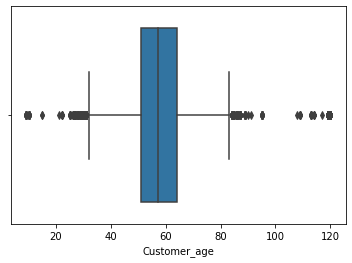

In [45]:
sns.boxplot(df['Customer_age'])
plt.show()

# treating Outliers

In [46]:
df = df[(df['Customer_age'] > 20) & (df['Customer_age'] < 90)]
df.shape

(67426, 11)

<AxesSubplot:xlabel='Customer_age'>

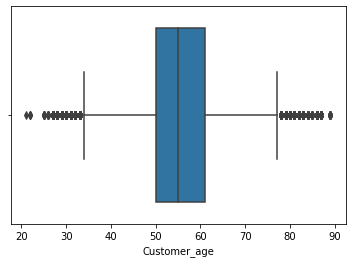

In [47]:
sns.boxplot(df['Customer_age'])

In [48]:
df.shape

(67426, 11)

# Handling Misssing Values

In [49]:
df.isnull().sum()

Product_Ref_ID                 0
Size                           0
Color_Code                     0
Product_Category_Reference     0
Cost_to_Customer(USD)          0
Gender                         0
Customer_Location              0
Order_Repeat_Chance            0
Days_Between_Placed_Deliver    0
Customer_age                   0
Membership_since(Years)        0
dtype: int64

<AxesSubplot:>

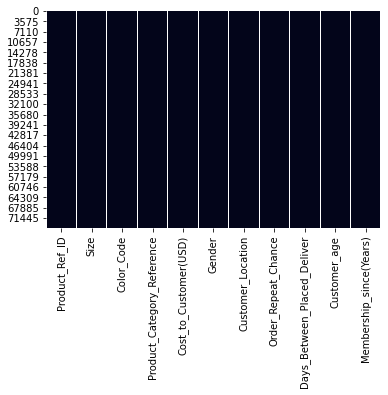

In [50]:
sns.heatmap(df.isnull(), cbar = False)

# Separating Numerical  and Categorical

In [51]:
df_numeric = df.select_dtypes(np.number)
df_categoric = df.select_dtypes('object')

In [52]:
df_numeric.columns

Index(['Product_Ref_ID', 'Product_Category_Reference', 'Cost_to_Customer(USD)',
       'Order_Repeat_Chance', 'Days_Between_Placed_Deliver', 'Customer_age',
       'Membership_since(Years)'],
      dtype='object')

In [53]:
df_categoric.columns

Index(['Size', 'Color_Code', 'Gender', 'Customer_Location'], dtype='object')

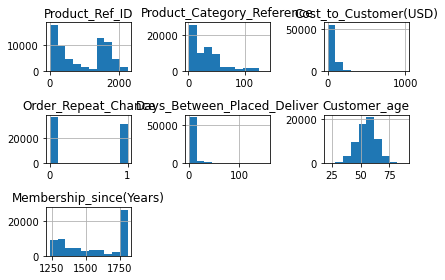

In [54]:
df_numeric.hist()
plt.tight_layout()
plt.show()

**We can see that Cost_to_customer(USD) and Product_category_reference is right skewed**

**So We are applying Log Transformation on this Features**

In [55]:
df['Cost_to_Customer(USD)'] = np.log1p(df['Cost_to_Customer(USD)'])

In [56]:
df['Product_Category_Reference'] = np.log1p(df['Product_Category_Reference'])

In [57]:
df['Days_Between_Placed_Deliver'] = np.log1p(df['Days_Between_Placed_Deliver'])

In [58]:
df['Product_Ref_ID'] = np.log1p(df['Product_Ref_ID'])

In [59]:
df['Membership_since(Years)'] = np.sqrt(df['Membership_since(Years)'])

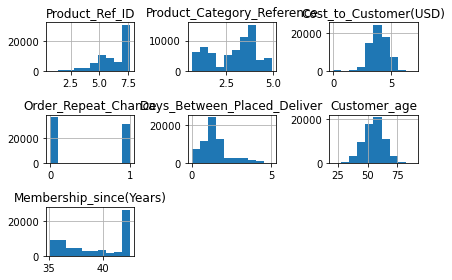

In [60]:
df.hist()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Membership_since(Years)', ylabel='Density'>

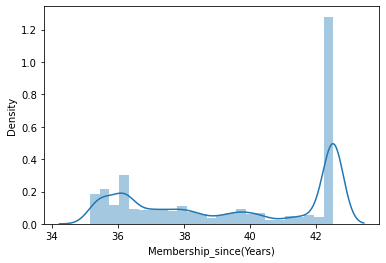

In [61]:
sns.distplot(df['Membership_since(Years)'])

### applying Ordinal encoding on Categorical Features

In [62]:
df_numeric = df.select_dtypes(np.number)
df_categoric = df.select_dtypes('object')

In [63]:
oe = OrdinalEncoder()
df_categoric[df_categoric.columns] = oe.fit_transform(df_categoric)

In [64]:
df1 = pd.concat([df_numeric, df_categoric], axis = 1)

In [65]:
df1.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Order_Repeat_Chance,Days_Between_Placed_Deliver,Customer_age,Membership_since(Years),Size,Color_Code,Gender,Customer_Location
0,6.800170,3.526361,3.039749,0,0.693147,60,42.520583,83.0,45.0,3.0,5.0
1,7.351158,3.465736,4.509760,1,1.791759,62,39.217343,87.0,63.0,3.0,7.0
2,5.680173,1.609438,4.188138,0,1.791759,59,36.207734,49.0,45.0,3.0,6.0
3,7.276556,3.401197,4.109233,0,0.693147,68,42.520583,89.0,45.0,3.0,7.0
4,7.255591,1.386294,3.131137,0,0.693147,57,39.761791,84.0,53.0,3.0,9.0


In [66]:
X = df1.drop('Order_Repeat_Chance', axis = 1)
y = df1['Order_Repeat_Chance']

In [67]:
X_c = X.columns

In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [69]:
X = pd.DataFrame(X, columns = X_c)
X.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Days_Between_Placed_Deliver,Customer_age,Membership_since(Years),Size,Color_Code,Gender,Customer_Location
0,0.408884,0.532632,-1.229255,-0.754749,0.535437,1.071960,0.731250,0.380214,0.181415,-0.301396
1,0.818673,0.481131,0.768166,0.397061,0.768272,-0.093477,0.929143,1.216232,0.181415,0.166188
2,-0.424096,-1.095813,0.331153,0.397061,0.419019,-1.155317,-0.950841,0.380214,0.181415,-0.067604
3,0.763189,0.426305,0.223938,-0.754749,1.466777,1.071960,1.028089,0.380214,0.181415,0.166188
4,0.747596,-1.285375,-1.105080,-0.754749,0.186184,0.098613,0.780723,0.751778,0.181415,0.633772


In [70]:
X.shape

(67426, 10)

In [71]:

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (47198, 10)
The shape of X_test is: (20228, 10)
The shape of y_train is: (47198,)
The shape of y_test is: (20228,)


# Creating Models

In [72]:
#Building models and evaluating metrics

column = ['Model_name', 'Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
          'Kappa Score', 'f1-score', "confusion matrix", 'Sensitivity', 'Specificity']

result_tab = pd.DataFrame(columns=column)

models=[LogisticRegression(), AdaBoostClassifier(), GaussianNB(), KNeighborsClassifier(),
        RandomForestClassifier(), XGBClassifier(), ExtraTreesClassifier(), 
        GradientBoostingClassifier(), CatBoostClassifier()]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print('----------',str(i).upper(),'--------')
        print()
        
        method=i
        method.fit(X_train,y_train)
        y_pred = method.predict(X_test)
       
        
        
        pred_prob1 = method.predict_proba(X_test)
        
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        print('Confusion Matrix \n', confusion_mat)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False positve rate (1- Specificity)')
        plt.ylabel('True positive rate (Sensitivity)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1[:,1]),
                    'Precision Score': metrics.precision_score(y_test, y_pred),
                    'Recall Score': metrics.recall_score(y_test, y_pred),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred),
                    "confusion matrix":confusion_matrix(y_pred,y_test),
                    'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab = result_tab.append(modd,ignore_index=True)
        
    return result_tab

---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[7931 5469]
 [2957 3871]]
classification report:                  precision    recall  f1-score   support

           0       0.73      0.59      0.65     13400
           1       0.41      0.57      0.48      6828

    accuracy                           0.58     20228
   macro avg       0.57      0.58      0.57     20228
weighted avg       0.62      0.58      0.59     20228

PPV:  72.84166054371785
NPV:  41.44539614561028


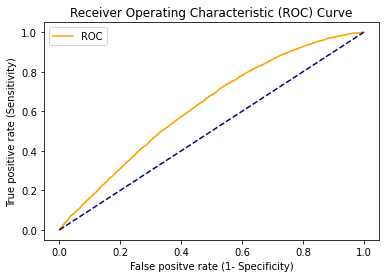


---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[6433 3161]
 [4455 6179]]
classification report:                  precision    recall  f1-score   support

           0       0.59      0.67      0.63      9594
           1       0.66      0.58      0.62     10634

    accuracy                           0.62     20228
   macro avg       0.63      0.63      0.62     20228
weighted avg       0.63      0.62      0.62     20228

PPV:  59.083394562821454
NPV:  66.15631691648822


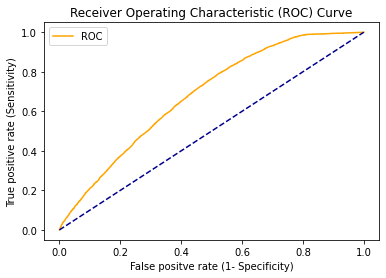


---------- GAUSSIANNB() --------

Confusion Matrix 
 [[6912 4030]
 [3976 5310]]
classification report:                  precision    recall  f1-score   support

           0       0.63      0.63      0.63     10942
           1       0.57      0.57      0.57      9286

    accuracy                           0.60     20228
   macro avg       0.60      0.60      0.60     20228
weighted avg       0.60      0.60      0.60     20228

PPV:  63.48273328434974
NPV:  56.852248394004285


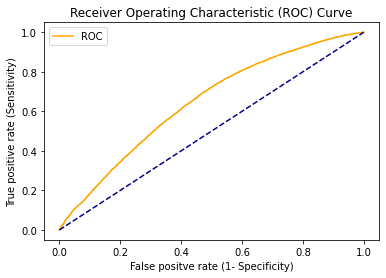


---------- KNEIGHBORSCLASSIFIER() --------

Confusion Matrix 
 [[6641 3940]
 [4247 5400]]
classification report:                  precision    recall  f1-score   support

           0       0.61      0.63      0.62     10581
           1       0.58      0.56      0.57      9647

    accuracy                           0.60     20228
   macro avg       0.59      0.59      0.59     20228
weighted avg       0.59      0.60      0.59     20228

PPV:  60.99375459221161
NPV:  57.815845824411134


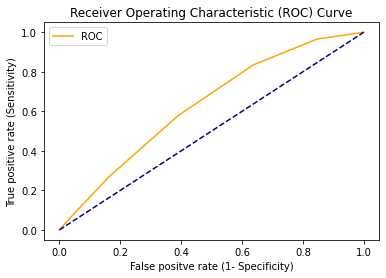


---------- RANDOMFORESTCLASSIFIER() --------

Confusion Matrix 
 [[7069 3411]
 [3819 5929]]
classification report:                  precision    recall  f1-score   support

           0       0.65      0.67      0.66     10480
           1       0.63      0.61      0.62      9748

    accuracy                           0.64     20228
   macro avg       0.64      0.64      0.64     20228
weighted avg       0.64      0.64      0.64     20228

PPV:  64.92468772961058
NPV:  63.479657387580296


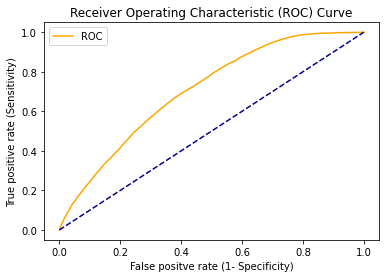


---------- XGBCLASSIFIER(BASE_SCORE=NONE, BOOSTER=NONE, COLSAMPLE_BYLEVEL=NONE,
              COLSAMPLE_BYNODE=NONE, COLSAMPLE_BYTREE=NONE, GAMMA=NONE,
              GPU_ID=NONE, IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=NONE, MAX_DELTA_STEP=NONE, MAX_DEPTH=NONE,
              MIN_CHILD_WEIGHT=NONE, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=NONE, NUM_PARALLEL_TREE=NONE,
              RANDOM_STATE=NONE, REG_ALPHA=NONE, REG_LAMBDA=NONE,
              SCALE_POS_WEIGHT=NONE, SUBSAMPLE=NONE, TREE_METHOD=NONE,
              VALIDATE_PARAMETERS=NONE, VERBOSITY=NONE) --------

[22:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 
 [[6904 3251]
 [39

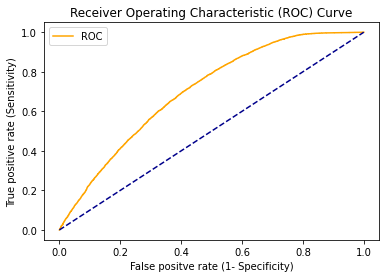


---------- EXTRATREESCLASSIFIER() --------

Confusion Matrix 
 [[7095 3586]
 [3793 5754]]
classification report:                  precision    recall  f1-score   support

           0       0.65      0.66      0.66     10681
           1       0.62      0.60      0.61      9547

    accuracy                           0.64     20228
   macro avg       0.63      0.63      0.63     20228
weighted avg       0.63      0.64      0.63     20228

PPV:  65.16348273328435
NPV:  61.605995717344754


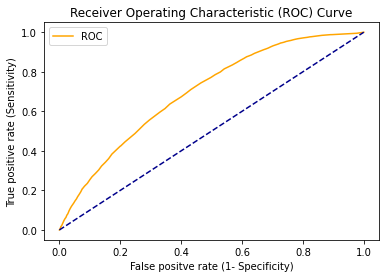


---------- GRADIENTBOOSTINGCLASSIFIER() --------

Confusion Matrix 
 [[6314 2855]
 [4574 6485]]
classification report:                  precision    recall  f1-score   support

           0       0.58      0.69      0.63      9169
           1       0.69      0.59      0.64     11059

    accuracy                           0.63     20228
   macro avg       0.64      0.64      0.63     20228
weighted avg       0.64      0.63      0.63     20228

PPV:  57.99044819985305
NPV:  69.43254817987152


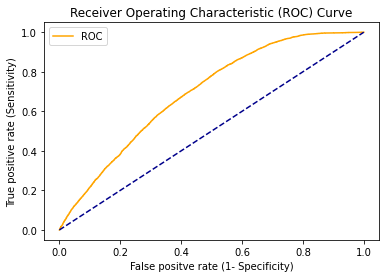


---------- <CATBOOST.CORE.CATBOOSTCLASSIFIER OBJECT AT 0X0000023227D4BBB0> --------

Learning rate set to 0.053419
0:	learn: 0.6837894	total: 144ms	remaining: 2m 23s
1:	learn: 0.6757216	total: 228ms	remaining: 1m 53s
2:	learn: 0.6686320	total: 286ms	remaining: 1m 34s
3:	learn: 0.6625934	total: 330ms	remaining: 1m 22s
4:	learn: 0.6571870	total: 370ms	remaining: 1m 13s
5:	learn: 0.6524778	total: 410ms	remaining: 1m 7s
6:	learn: 0.6484638	total: 439ms	remaining: 1m 2s
7:	learn: 0.6450484	total: 466ms	remaining: 57.8s
8:	learn: 0.6417307	total: 506ms	remaining: 55.7s
9:	learn: 0.6388798	total: 553ms	remaining: 54.8s
10:	learn: 0.6363325	total: 582ms	remaining: 52.3s
11:	learn: 0.6342200	total: 626ms	remaining: 51.6s
12:	learn: 0.6323514	total: 662ms	remaining: 50.2s
13:	learn: 0.6307732	total: 703ms	remaining: 49.5s
14:	learn: 0.6292073	total: 733ms	remaining: 48.1s
15:	learn: 0.6279401	total: 777ms	remaining: 47.8s
16:	learn: 0.6266816	total: 816ms	remaining: 47.2s
17:	learn: 0.6255956	t

159:	learn: 0.6016704	total: 6.34s	remaining: 33.3s
160:	learn: 0.6015995	total: 6.37s	remaining: 33.2s
161:	learn: 0.6015126	total: 6.42s	remaining: 33.2s
162:	learn: 0.6014757	total: 6.46s	remaining: 33.2s
163:	learn: 0.6014023	total: 6.49s	remaining: 33.1s
164:	learn: 0.6013149	total: 6.54s	remaining: 33.1s
165:	learn: 0.6012601	total: 6.59s	remaining: 33.1s
166:	learn: 0.6011820	total: 6.65s	remaining: 33.2s
167:	learn: 0.6011302	total: 6.69s	remaining: 33.1s
168:	learn: 0.6010795	total: 6.74s	remaining: 33.1s
169:	learn: 0.6009893	total: 6.77s	remaining: 33.1s
170:	learn: 0.6009116	total: 6.8s	remaining: 33s
171:	learn: 0.6008334	total: 6.87s	remaining: 33.1s
172:	learn: 0.6007556	total: 6.92s	remaining: 33.1s
173:	learn: 0.6007205	total: 6.96s	remaining: 33s
174:	learn: 0.6006818	total: 6.99s	remaining: 33s
175:	learn: 0.6006400	total: 7.03s	remaining: 32.9s
176:	learn: 0.6005528	total: 7.11s	remaining: 33s
177:	learn: 0.6005064	total: 7.14s	remaining: 33s
178:	learn: 0.6004728	t

321:	learn: 0.5894810	total: 12.5s	remaining: 26.4s
322:	learn: 0.5894048	total: 12.6s	remaining: 26.3s
323:	learn: 0.5893517	total: 12.6s	remaining: 26.2s
324:	learn: 0.5892558	total: 12.6s	remaining: 26.2s
325:	learn: 0.5891860	total: 12.6s	remaining: 26.1s
326:	learn: 0.5891193	total: 12.7s	remaining: 26.1s
327:	learn: 0.5890674	total: 12.7s	remaining: 26s
328:	learn: 0.5889879	total: 12.7s	remaining: 26s
329:	learn: 0.5888906	total: 12.8s	remaining: 25.9s
330:	learn: 0.5888275	total: 12.8s	remaining: 25.9s
331:	learn: 0.5887892	total: 12.8s	remaining: 25.8s
332:	learn: 0.5887240	total: 12.9s	remaining: 25.8s
333:	learn: 0.5886544	total: 12.9s	remaining: 25.7s
334:	learn: 0.5885725	total: 12.9s	remaining: 25.6s
335:	learn: 0.5885016	total: 12.9s	remaining: 25.6s
336:	learn: 0.5884296	total: 13s	remaining: 25.5s
337:	learn: 0.5883711	total: 13s	remaining: 25.5s
338:	learn: 0.5882870	total: 13s	remaining: 25.4s
339:	learn: 0.5881879	total: 13.1s	remaining: 25.4s
340:	learn: 0.5881141	

480:	learn: 0.5786847	total: 17.3s	remaining: 18.7s
481:	learn: 0.5786492	total: 17.4s	remaining: 18.7s
482:	learn: 0.5786038	total: 17.4s	remaining: 18.6s
483:	learn: 0.5785950	total: 17.4s	remaining: 18.6s
484:	learn: 0.5785526	total: 17.4s	remaining: 18.5s
485:	learn: 0.5785200	total: 17.5s	remaining: 18.5s
486:	learn: 0.5784592	total: 17.5s	remaining: 18.4s
487:	learn: 0.5783827	total: 17.5s	remaining: 18.4s
488:	learn: 0.5782967	total: 17.6s	remaining: 18.4s
489:	learn: 0.5782833	total: 17.6s	remaining: 18.3s
490:	learn: 0.5782147	total: 17.6s	remaining: 18.3s
491:	learn: 0.5781672	total: 17.7s	remaining: 18.2s
492:	learn: 0.5781469	total: 17.7s	remaining: 18.2s
493:	learn: 0.5780981	total: 17.7s	remaining: 18.1s
494:	learn: 0.5780796	total: 17.7s	remaining: 18.1s
495:	learn: 0.5780427	total: 17.8s	remaining: 18.1s
496:	learn: 0.5779917	total: 17.8s	remaining: 18s
497:	learn: 0.5779387	total: 17.8s	remaining: 18s
498:	learn: 0.5779053	total: 17.8s	remaining: 17.9s
499:	learn: 0.57

642:	learn: 0.5697419	total: 22.7s	remaining: 12.6s
643:	learn: 0.5696427	total: 22.8s	remaining: 12.6s
644:	learn: 0.5695873	total: 22.8s	remaining: 12.6s
645:	learn: 0.5695307	total: 22.8s	remaining: 12.5s
646:	learn: 0.5694582	total: 22.9s	remaining: 12.5s
647:	learn: 0.5694078	total: 22.9s	remaining: 12.4s
648:	learn: 0.5693632	total: 22.9s	remaining: 12.4s
649:	learn: 0.5693191	total: 23s	remaining: 12.4s
650:	learn: 0.5692752	total: 23s	remaining: 12.3s
651:	learn: 0.5692402	total: 23s	remaining: 12.3s
652:	learn: 0.5692026	total: 23.1s	remaining: 12.3s
653:	learn: 0.5691534	total: 23.1s	remaining: 12.2s
654:	learn: 0.5691277	total: 23.1s	remaining: 12.2s
655:	learn: 0.5690462	total: 23.2s	remaining: 12.2s
656:	learn: 0.5690210	total: 23.2s	remaining: 12.1s
657:	learn: 0.5689963	total: 23.2s	remaining: 12.1s
658:	learn: 0.5689548	total: 23.3s	remaining: 12s
659:	learn: 0.5688965	total: 23.3s	remaining: 12s
660:	learn: 0.5688657	total: 23.3s	remaining: 12s
661:	learn: 0.5688269	to

804:	learn: 0.5615121	total: 28s	remaining: 6.78s
805:	learn: 0.5614677	total: 28s	remaining: 6.74s
806:	learn: 0.5613993	total: 28s	remaining: 6.7s
807:	learn: 0.5613880	total: 28.1s	remaining: 6.67s
808:	learn: 0.5613249	total: 28.1s	remaining: 6.63s
809:	learn: 0.5612658	total: 28.1s	remaining: 6.6s
810:	learn: 0.5611904	total: 28.2s	remaining: 6.56s
811:	learn: 0.5611504	total: 28.2s	remaining: 6.52s
812:	learn: 0.5610965	total: 28.2s	remaining: 6.49s
813:	learn: 0.5610485	total: 28.2s	remaining: 6.45s
814:	learn: 0.5609718	total: 28.3s	remaining: 6.42s
815:	learn: 0.5608926	total: 28.3s	remaining: 6.38s
816:	learn: 0.5608434	total: 28.3s	remaining: 6.35s
817:	learn: 0.5608019	total: 28.4s	remaining: 6.31s
818:	learn: 0.5607574	total: 28.4s	remaining: 6.27s
819:	learn: 0.5606845	total: 28.4s	remaining: 6.24s
820:	learn: 0.5606591	total: 28.4s	remaining: 6.2s
821:	learn: 0.5606132	total: 28.5s	remaining: 6.17s
822:	learn: 0.5605832	total: 28.5s	remaining: 6.13s
823:	learn: 0.5605502

964:	learn: 0.5535764	total: 32.5s	remaining: 1.18s
965:	learn: 0.5535295	total: 32.6s	remaining: 1.15s
966:	learn: 0.5534854	total: 32.6s	remaining: 1.11s
967:	learn: 0.5534458	total: 32.6s	remaining: 1.08s
968:	learn: 0.5533912	total: 32.6s	remaining: 1.04s
969:	learn: 0.5533772	total: 32.7s	remaining: 1.01s
970:	learn: 0.5533492	total: 32.7s	remaining: 977ms
971:	learn: 0.5533010	total: 32.7s	remaining: 943ms
972:	learn: 0.5532052	total: 32.8s	remaining: 909ms
973:	learn: 0.5531618	total: 32.8s	remaining: 875ms
974:	learn: 0.5531467	total: 32.8s	remaining: 842ms
975:	learn: 0.5531113	total: 32.9s	remaining: 808ms
976:	learn: 0.5530736	total: 32.9s	remaining: 774ms
977:	learn: 0.5530133	total: 32.9s	remaining: 740ms
978:	learn: 0.5529560	total: 32.9s	remaining: 707ms
979:	learn: 0.5529217	total: 33s	remaining: 673ms
980:	learn: 0.5528547	total: 33s	remaining: 639ms
981:	learn: 0.5528124	total: 33s	remaining: 605ms
982:	learn: 0.5527732	total: 33s	remaining: 572ms
983:	learn: 0.552724

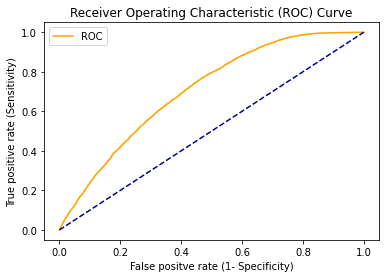

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base,LogisticRegression(),0.624237,0.566930,0.414454,0.583449,0.145655,0.478847,"[[7931, 5469], [2957, 3871]]",59.186567,56.693029
1,Base,AdaBoostClassifier(),0.680572,0.581061,0.661563,0.623492,0.249936,0.618704,"[[6433, 3161], [4455, 6179]]",67.052324,58.106075
2,Base,GaussianNB(),0.644306,0.571829,0.568522,0.604212,0.203433,0.570171,"[[6912, 4030], [3976, 5310]]",63.169439,57.182856
3,Base,KNeighborsClassifier(),0.632132,0.559760,0.578158,0.595264,0.187658,0.568810,"[[6641, 3940], [4247, 5400]]",62.763444,55.975951
4,Base,RandomForestClassifier(),0.704949,0.608227,0.634797,0.642575,0.283164,0.621228,"[[7069, 3411], [3819, 5929]]",67.452290,60.822733
5,Base,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.701927,0.604487,0.651927,0.642327,0.284433,0.627312,"[[6904, 3251], [3984, 6089]]",67.986214,60.448724
6,Base,ExtraTreesClassifier(),0.696259,0.602702,0.616060,0.635209,0.267274,0.609308,"[[7095, 3586], [3793, 5754]]",66.426365,60.270242
7,Base,GradientBoostingClassifier(),0.692443,0.586400,0.694325,0.632737,0.270688,0.635815,"[[6314, 2855], [4574, 6485]]",68.862471,58.640022
8,Base,<catboost.core.CatBoostClassifier object at 0x...,0.704799,0.597924,0.678266,0.640844,0.284294,0.635566,"[[6628, 3005], [4260, 6335]]",68.805149,59.792355


In [73]:
func('Base')

In [74]:
result_tab

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base,LogisticRegression(),0.624237,0.566930,0.414454,0.583449,0.145655,0.478847,"[[7931, 5469], [2957, 3871]]",59.186567,56.693029
1,Base,AdaBoostClassifier(),0.680572,0.581061,0.661563,0.623492,0.249936,0.618704,"[[6433, 3161], [4455, 6179]]",67.052324,58.106075
2,Base,GaussianNB(),0.644306,0.571829,0.568522,0.604212,0.203433,0.570171,"[[6912, 4030], [3976, 5310]]",63.169439,57.182856
3,Base,KNeighborsClassifier(),0.632132,0.559760,0.578158,0.595264,0.187658,0.568810,"[[6641, 3940], [4247, 5400]]",62.763444,55.975951
4,Base,RandomForestClassifier(),0.704949,0.608227,0.634797,0.642575,0.283164,0.621228,"[[7069, 3411], [3819, 5929]]",67.452290,60.822733
5,Base,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.701927,0.604487,0.651927,0.642327,0.284433,0.627312,"[[6904, 3251], [3984, 6089]]",67.986214,60.448724
6,Base,ExtraTreesClassifier(),0.696259,0.602702,0.616060,0.635209,0.267274,0.609308,"[[7095, 3586], [3793, 5754]]",66.426365,60.270242
7,Base,GradientBoostingClassifier(),0.692443,0.586400,0.694325,0.632737,0.270688,0.635815,"[[6314, 2855], [4574, 6485]]",68.862471,58.640022
8,Base,<catboost.core.CatBoostClassifier object at 0x...,0.704799,0.597924,0.678266,0.640844,0.284294,0.635566,"[[6628, 3005], [4260, 6335]]",68.805149,59.792355


# Test Data

**We will do same operations as we did on Train Data**

In [75]:
test = pd.read_csv('test_fashion.csv')
test.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date
0,75722,2016-08-20,2016-08-23,1745,13,blue,64,75.0,43916,Mrs,1975-01-31,Bavaria,2016-08-21
1,80185,2016-08-24,2016-08-28,1806,unsized,black,110,16.9,44684,Mrs,1969-12-10,Bavaria,2015-02-17
2,19865,2016-06-30,2016-08-02,22,l,green,14,19.9,34106,Mrs,1968-01-18,Thuringia,2015-02-17
3,76700,2016-08-21,2016-08-24,1683,l,blue,97,39.9,34160,Mrs,1961-03-31,Hesse,2016-03-03
4,92992,2016-09-04,2016-09-06,1500,l,petrol,11,69.9,11929,Mrs,1962-06-02,Baden-Wuerttemberg,2016-04-23


In [76]:
test.shape

(25000, 13)

In [77]:
test.describe()

,Order_Ref_Number,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID
count,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,49993.232160,922.301640,30.07680,64.559979,27182.314200
std,28820.379008,702.069155,28.14961,47.077775,14081.984634
min,9.000000,1.000000,1.00000,0.000000,24.000000
25%,25106.500000,214.000000,5.00000,29.900000,14900.000000
50%,49898.000000,808.000000,25.00000,49.900000,31229.000000
75%,74865.250000,1578.250000,43.00000,79.900000,38911.000000
max,100000.000000,2241.000000,138.00000,399.950000,48237.000000


In [78]:
test.describe(include = 'object').T

,count,unique,top,freq
Order_Placed_AT,25000,82,2016-06-27,1387
Order_Delivered_Date,22703,115,2016-07-03,1260
Size,25000,93,l,3114
Color_Code,25000,76,black,4585
Gender,25000,5,Mrs,23815
Customer_BirthDate,22830,7008,1900-11-21,210
Customer_Location,25000,16,North Rhine-Westphalia,5742
Customer_Joining_Date,25000,568,2015-02-17,8523


## Feature Engineering 


In [79]:
id = test['Order_Ref_Number']

In [80]:
test.drop('Order_Ref_Number', axis = 1, inplace = True)

In [81]:
test['Color_Code'].unique()

array(['blue', 'black', 'green', 'petrol', 'purple', 'berry', 'stained',
       'brown', 'mocca', 'white', 'nature', 'red', 'grey', 'curry',
       'ocher', 'denim', 'ash', 'turquoise', 'olive', 'anthracite',
       'beige', 'magenta', 'pink', 'fuchsia', 'striped', 'ancient',
       'dark denim', 'mahagoni', 'coral', 'aubergine', 'azure', 'navy',
       'orange', 'pallid', 'ivory', 'mango', 'basalt', 'kanel',
       'dark oliv', 'aqua', 'yellow', 'bordeaux', 'dark garnet', 'gold',
       'mint', 'ecru', 'blau', 'silver', 'hibiscus', '?', 'aquamarine',
       'champagner', 'khaki', 'brwon', 'cognac', 'floral', 'darkblue',
       'dark navy', 'habana', 'cobalt blue', 'dark grey', 'jade',
       'avocado', 'almond', 'aviator', 'ebony', 'antique pink',
       'terracotta', 'curled', 'baltic blue', 'caramel', 'apricot',
       'copper coin', 'amethyst', 'currant purple', 'creme'], dtype=object)

In [82]:
test['Color_Code'] = test['Color_Code'].replace('?', test['Color_Code'].mode()[0])

In [83]:
test.isnull().sum()

Order_Placed_AT                  0
Order_Delivered_Date          2297
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            2170
Customer_Location                0
Customer_Joining_Date            0
dtype: int64

In [84]:
# converting features into datetime feature
test['Order_Placed_AT'] = pd.to_datetime(test['Order_Placed_AT'])

test['Order_Delivered_Date'] = pd.to_datetime(test['Order_Delivered_Date'])

test['Customer_BirthDate'] = pd.to_datetime(test['Customer_BirthDate'])

In [85]:
test['Days_Between_Placed_Deliver'] = (test['Order_Delivered_Date'] - test['Order_Placed_AT'])
test['Days_Between_Placed_Deliver'] = test['Days_Between_Placed_Deliver']/np.timedelta64(1, 'D')
test['Days_Between_Placed_Deliver'].head()

0     3.0
1     4.0
2    33.0
3     3.0
4     2.0
Name: Days_Between_Placed_Deliver, dtype: float64

In [86]:
test['Days_Between_Placed_Deliver']

0           3.0
1           4.0
2          33.0
3           3.0
4           2.0
5           1.0
6           2.0
7           3.0
8           7.0
9           4.0
10          1.0
11          3.0
12          2.0
13          5.0
14          NaN
15          NaN
16          3.0
17          3.0
18          4.0
19          2.0
20          4.0
21          1.0
22          3.0
23      -7852.0
24          3.0
25          3.0
26          3.0
27          1.0
28          1.0
29          NaN
30          1.0
31          2.0
32          4.0
33          3.0
34          NaN
35          NaN
36          5.0
37          NaN
38          4.0
39          7.0
40          4.0
41          3.0
42          3.0
43          8.0
44          NaN
45          5.0
46          4.0
47          2.0
48          2.0
49         70.0
50          3.0
51          NaN
52          5.0
53          5.0
54          3.0
55         33.0
56          1.0
57          4.0
58          5.0
59          4.0
60          2.0
61          1.0
62      

In [87]:
test['Days_Between_Placed_Deliver'] = test['Days_Between_Placed_Deliver'].apply(lambda x : 0 if x < 0 else x)

In [88]:
test['Days_Between_Placed_Deliver'] = test['Days_Between_Placed_Deliver'].fillna(0)

In [89]:
test = test.drop(['Order_Delivered_Date', 'Order_Placed_AT'], axis = 1)

# Age

In [90]:
test['Customer_BirthDate'] = test['Customer_BirthDate'].fillna(test['Customer_BirthDate'].mode()[0])

In [91]:
test['Customer_BirthDate'] = test['Customer_BirthDate'].apply(lambda x : str(x).split('-')[0]).astype(int)

In [92]:
test['Customer_age'] = 2020 - test['Customer_BirthDate']

In [93]:
test.isnull().sum()

Product_Ref_ID                 0
Size                           0
Color_Code                     0
Product_Category_Reference     0
Cost_to_Customer(USD)          0
Customer_ID                    0
Gender                         0
Customer_BirthDate             0
Customer_Location              0
Customer_Joining_Date          0
Days_Between_Placed_Deliver    0
Customer_age                   0
dtype: int64

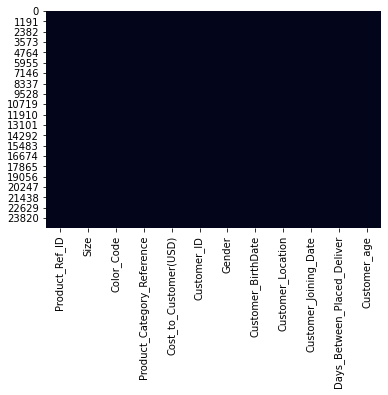

In [94]:
sns.heatmap(test.isnull(), cbar = False)
plt.show()

In [95]:
test = test.drop(['Customer_BirthDate'], axis = 1)

# Membership

In [96]:
test['Customer_Joining_Date'] = pd.to_datetime(test['Customer_Joining_Date'])

In [97]:
now = pd.to_datetime('2020-01-30')
now

Timestamp('2020-01-30 00:00:00')

In [98]:
test['Membership_since(Years)'] = now - test['Customer_Joining_Date']

In [99]:
test['Membership_since(Years)'].head()

0   1257 days
1   1808 days
2   1808 days
3   1428 days
4   1377 days
Name: Membership_since(Years), dtype: timedelta64[ns]

In [100]:
# applying function as we are taking only numerical value from the column and convertin it into numerical feature
test['Membership_since(Years)'] = test['Membership_since(Years)'].apply(lambda x : str(x).split(' ')[0]).astype('int64')

In [101]:
test['Membership_since(Years)'].head()

0    1257
1    1808
2    1808
3    1428
4    1377
Name: Membership_since(Years), dtype: int64

In [102]:
test = test.drop(['Customer_Joining_Date', 'Customer_ID'], axis = 1)

In [103]:
test['Size'] = test['Size'].replace('12+','12')

In [104]:
test['Size'] = test['Size'].replace('2+','2')

In [105]:
test_num = test.select_dtypes(np.number)

test_cat = test.select_dtypes('object')

In [106]:
test_num.columns

Index(['Product_Ref_ID', 'Product_Category_Reference', 'Cost_to_Customer(USD)',
       'Days_Between_Placed_Deliver', 'Customer_age',
       'Membership_since(Years)'],
      dtype='object')

In [107]:
test_cat.columns

Index(['Size', 'Color_Code', 'Gender', 'Customer_Location'], dtype='object')

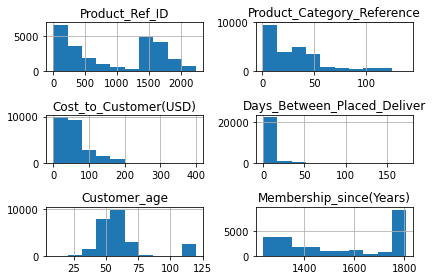

In [108]:
test_num.hist()
plt.tight_layout()
plt.show()

In [109]:
test['Cost_to_Customer(USD)'] = np.log1p(test['Cost_to_Customer(USD)'])

In [110]:
test['Product_Category_Reference'] = np.log1p(test['Product_Category_Reference'])

In [111]:
test['Product_Ref_ID'] = np.log1p(test['Product_Ref_ID'])

In [112]:
test['Days_Between_Placed_Deliver'] = np.log1p(test['Days_Between_Placed_Deliver'])

In [113]:
test['Membership_since(Years)'] = np.sqrt(test['Membership_since(Years)'])

array([[<AxesSubplot:title={'center':'Product_Ref_ID'}>,
        <AxesSubplot:title={'center':'Product_Category_Reference'}>],
       [<AxesSubplot:title={'center':'Cost_to_Customer(USD)'}>,
        <AxesSubplot:title={'center':'Days_Between_Placed_Deliver'}>],
       [<AxesSubplot:title={'center':'Customer_age'}>,
        <AxesSubplot:title={'center':'Membership_since(Years)'}>]],
      dtype=object)

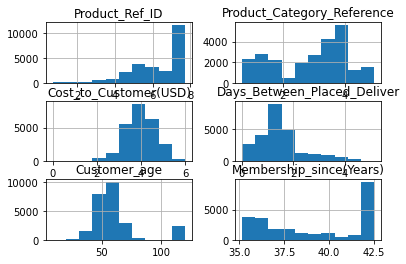

In [114]:
test.hist()

In [115]:
test_num = test.select_dtypes(np.number)

test_cat = test.select_dtypes('object')

In [116]:
oe = OrdinalEncoder()
test_cat[test_cat.columns] = oe.fit_transform(test_cat)

In [117]:
test1 = pd.concat([test_num, test_cat], axis = 1)
test1.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Days_Between_Placed_Deliver,Customer_age,Membership_since(Years),Size,Color_Code,Gender,Customer_Location
0,7.465083,4.174387,4.330733,1.386294,45,35.454196,10.0,19.0,3.0,1.0
1,7.499423,4.709530,2.884801,1.609438,51,42.520583,86.0,17.0,3.0,1.0
2,3.135494,2.708050,3.039749,3.526361,52,42.520583,83.0,45.0,3.0,15.0
3,7.428927,4.584967,3.711130,1.386294,59,37.788887,83.0,19.0,3.0,6.0
4,7.313887,2.484907,4.261270,1.098612,58,37.107951,83.0,64.0,3.0,0.0


In [118]:
X_train = df1.drop('Order_Repeat_Chance', axis = 1)

y_train = df1['Order_Repeat_Chance']

X_test = test1
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

The shape of X_train is: (67426, 10)
The shape of X_test is: (25000, 10)
The shape of y_train is: (67426,)


In [119]:
X_train.shape

(67426, 10)

In [120]:
X_test.shape

(25000, 10)

In [121]:
X_col = X_train.columns
X_col1 = X_test.columns

In [122]:
from sklearn.preprocessing import StandardScaler
minmax = StandardScaler()

In [123]:
# fit_transform will transform X_train into standardise values
X_train = minmax.fit_transform(X_train)

# fit_transform will transform X_test into standardise values
X_test = minmax.transform(X_test)

In [124]:
# creating dataframe with X_train giving columns = X_col
X_train = pd.DataFrame(X_train, columns = X_col)

# creating dataframe with X_test giving columns = X_col
X_test = pd.DataFrame(X_test, columns = X_col1)

# printing top 5 rows of dataframe
X_train.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Days_Between_Placed_Deliver,Customer_age,Membership_since(Years),Size,Color_Code,Gender,Customer_Location
0,0.408884,0.532632,-1.229255,-0.754749,0.535437,1.071960,0.731250,0.380214,0.181415,-0.301396
1,0.818673,0.481131,0.768166,0.397061,0.768272,-0.093477,0.929143,1.216232,0.181415,0.166188
2,-0.424096,-1.095813,0.331153,0.397061,0.419019,-1.155317,-0.950841,0.380214,0.181415,-0.067604
3,0.763189,0.426305,0.223938,-0.754749,1.466777,1.071960,1.028089,0.380214,0.181415,0.166188
4,0.747596,-1.285375,-1.105080,-0.754749,0.186184,0.098613,0.780723,0.751778,0.181415,0.633772


In [125]:
X_test.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Days_Between_Placed_Deliver,Customer_age,Membership_since(Years),Size,Color_Code,Gender,Customer_Location
0,0.903402,1.083137,0.524908,-0.028038,-1.210826,-1.421177,-2.880297,-0.827368,0.181415,-1.236563
1,0.928942,1.537746,-1.439796,0.205911,-0.512321,1.071960,0.879669,-0.920259,0.181415,-1.236563
2,-2.316659,-0.162531,-1.229255,2.215656,-0.395904,1.071960,0.731250,0.380214,0.181415,2.036524
3,0.876512,1.431929,-0.316996,-0.028038,0.419019,-0.597460,0.731250,-0.827368,0.181415,-0.067604
4,0.790953,-0.352093,0.430524,-0.329651,0.302602,-0.837706,0.731250,1.262677,0.181415,-1.470355


In [126]:
xgb = CatBoostClassifier()
xgb.fit(X_train, y_train)

Learning rate set to 0.062208
0:	learn: 0.6825344	total: 36.5ms	remaining: 36.5s
1:	learn: 0.6735126	total: 73.5ms	remaining: 36.7s
2:	learn: 0.6658126	total: 115ms	remaining: 38.3s
3:	learn: 0.6595354	total: 157ms	remaining: 39.1s
4:	learn: 0.6537215	total: 203ms	remaining: 40.3s
5:	learn: 0.6489754	total: 262ms	remaining: 43.4s
6:	learn: 0.6451136	total: 300ms	remaining: 42.6s
7:	learn: 0.6416993	total: 338ms	remaining: 41.9s
8:	learn: 0.6385340	total: 376ms	remaining: 41.4s
9:	learn: 0.6360620	total: 414ms	remaining: 41s
10:	learn: 0.6338363	total: 454ms	remaining: 40.8s
11:	learn: 0.6317396	total: 492ms	remaining: 40.5s
12:	learn: 0.6300308	total: 531ms	remaining: 40.3s
13:	learn: 0.6286412	total: 573ms	remaining: 40.3s
14:	learn: 0.6272977	total: 612ms	remaining: 40.2s
15:	learn: 0.6259976	total: 653ms	remaining: 40.2s
16:	learn: 0.6249151	total: 697ms	remaining: 40.3s
17:	learn: 0.6239183	total: 738ms	remaining: 40.3s
18:	learn: 0.6230987	total: 781ms	remaining: 40.3s
19:	learn: 

160:	learn: 0.6032404	total: 7.39s	remaining: 38.5s
161:	learn: 0.6031722	total: 7.44s	remaining: 38.5s
162:	learn: 0.6030929	total: 7.48s	remaining: 38.4s
163:	learn: 0.6030572	total: 7.52s	remaining: 38.3s
164:	learn: 0.6029570	total: 7.57s	remaining: 38.3s
165:	learn: 0.6028732	total: 7.63s	remaining: 38.4s
166:	learn: 0.6027921	total: 7.68s	remaining: 38.3s
167:	learn: 0.6027097	total: 7.74s	remaining: 38.3s
168:	learn: 0.6026341	total: 7.79s	remaining: 38.3s
169:	learn: 0.6025783	total: 7.85s	remaining: 38.3s
170:	learn: 0.6025098	total: 7.89s	remaining: 38.3s
171:	learn: 0.6024176	total: 7.94s	remaining: 38.2s
172:	learn: 0.6023242	total: 7.98s	remaining: 38.2s
173:	learn: 0.6022546	total: 8.03s	remaining: 38.1s
174:	learn: 0.6021757	total: 8.09s	remaining: 38.1s
175:	learn: 0.6020984	total: 8.14s	remaining: 38.1s
176:	learn: 0.6020292	total: 8.2s	remaining: 38.1s
177:	learn: 0.6019751	total: 8.26s	remaining: 38.1s
178:	learn: 0.6018833	total: 8.32s	remaining: 38.2s
179:	learn: 0

320:	learn: 0.5922765	total: 14.8s	remaining: 31.4s
321:	learn: 0.5921902	total: 14.9s	remaining: 31.3s
322:	learn: 0.5921198	total: 14.9s	remaining: 31.2s
323:	learn: 0.5920929	total: 14.9s	remaining: 31.2s
324:	learn: 0.5919878	total: 15s	remaining: 31.1s
325:	learn: 0.5919588	total: 15s	remaining: 31.1s
326:	learn: 0.5918674	total: 15.1s	remaining: 31s
327:	learn: 0.5917820	total: 15.1s	remaining: 31s
328:	learn: 0.5917444	total: 15.2s	remaining: 30.9s
329:	learn: 0.5916888	total: 15.2s	remaining: 30.9s
330:	learn: 0.5916455	total: 15.3s	remaining: 30.8s
331:	learn: 0.5915689	total: 15.3s	remaining: 30.8s
332:	learn: 0.5915149	total: 15.3s	remaining: 30.7s
333:	learn: 0.5915023	total: 15.4s	remaining: 30.7s
334:	learn: 0.5914336	total: 15.4s	remaining: 30.6s
335:	learn: 0.5913850	total: 15.5s	remaining: 30.6s
336:	learn: 0.5913210	total: 15.5s	remaining: 30.5s
337:	learn: 0.5912515	total: 15.5s	remaining: 30.4s
338:	learn: 0.5912089	total: 15.6s	remaining: 30.4s
339:	learn: 0.591156

480:	learn: 0.5830527	total: 22.4s	remaining: 24.2s
481:	learn: 0.5829966	total: 22.5s	remaining: 24.2s
482:	learn: 0.5829686	total: 22.5s	remaining: 24.1s
483:	learn: 0.5829185	total: 22.6s	remaining: 24.1s
484:	learn: 0.5828502	total: 22.6s	remaining: 24s
485:	learn: 0.5827941	total: 22.7s	remaining: 24s
486:	learn: 0.5827700	total: 22.7s	remaining: 23.9s
487:	learn: 0.5827428	total: 22.8s	remaining: 23.9s
488:	learn: 0.5826822	total: 22.9s	remaining: 23.9s
489:	learn: 0.5826586	total: 22.9s	remaining: 23.8s
490:	learn: 0.5825868	total: 22.9s	remaining: 23.8s
491:	learn: 0.5825124	total: 23s	remaining: 23.7s
492:	learn: 0.5824545	total: 23s	remaining: 23.7s
493:	learn: 0.5823789	total: 23.1s	remaining: 23.7s
494:	learn: 0.5823270	total: 23.1s	remaining: 23.6s
495:	learn: 0.5823001	total: 23.2s	remaining: 23.6s
496:	learn: 0.5822780	total: 23.3s	remaining: 23.5s
497:	learn: 0.5822398	total: 23.3s	remaining: 23.5s
498:	learn: 0.5822071	total: 23.4s	remaining: 23.4s
499:	learn: 0.582147

642:	learn: 0.5752752	total: 29.9s	remaining: 16.6s
643:	learn: 0.5752135	total: 30s	remaining: 16.6s
644:	learn: 0.5751818	total: 30s	remaining: 16.5s
645:	learn: 0.5751466	total: 30s	remaining: 16.5s
646:	learn: 0.5750830	total: 30.1s	remaining: 16.4s
647:	learn: 0.5750514	total: 30.1s	remaining: 16.4s
648:	learn: 0.5749826	total: 30.2s	remaining: 16.3s
649:	learn: 0.5749396	total: 30.2s	remaining: 16.3s
650:	learn: 0.5749218	total: 30.3s	remaining: 16.2s
651:	learn: 0.5748529	total: 30.3s	remaining: 16.2s
652:	learn: 0.5748323	total: 30.3s	remaining: 16.1s
653:	learn: 0.5747930	total: 30.4s	remaining: 16.1s
654:	learn: 0.5747675	total: 30.4s	remaining: 16s
655:	learn: 0.5747176	total: 30.5s	remaining: 16s
656:	learn: 0.5746898	total: 30.5s	remaining: 15.9s
657:	learn: 0.5746317	total: 30.5s	remaining: 15.9s
658:	learn: 0.5746157	total: 30.6s	remaining: 15.8s
659:	learn: 0.5745793	total: 30.6s	remaining: 15.8s
660:	learn: 0.5745191	total: 30.7s	remaining: 15.7s
661:	learn: 0.5744433	

805:	learn: 0.5679858	total: 37.3s	remaining: 8.99s
806:	learn: 0.5679518	total: 37.4s	remaining: 8.94s
807:	learn: 0.5679089	total: 37.4s	remaining: 8.89s
808:	learn: 0.5678484	total: 37.5s	remaining: 8.85s
809:	learn: 0.5677996	total: 37.5s	remaining: 8.8s
810:	learn: 0.5677734	total: 37.6s	remaining: 8.75s
811:	learn: 0.5677218	total: 37.6s	remaining: 8.71s
812:	learn: 0.5676898	total: 37.7s	remaining: 8.66s
813:	learn: 0.5676731	total: 37.7s	remaining: 8.62s
814:	learn: 0.5676080	total: 37.8s	remaining: 8.57s
815:	learn: 0.5675666	total: 37.8s	remaining: 8.52s
816:	learn: 0.5675102	total: 37.9s	remaining: 8.48s
817:	learn: 0.5674519	total: 37.9s	remaining: 8.43s
818:	learn: 0.5674214	total: 38s	remaining: 8.39s
819:	learn: 0.5673811	total: 38s	remaining: 8.34s
820:	learn: 0.5673484	total: 38s	remaining: 8.29s
821:	learn: 0.5672960	total: 38.1s	remaining: 8.24s
822:	learn: 0.5672445	total: 38.1s	remaining: 8.2s
823:	learn: 0.5672030	total: 38.2s	remaining: 8.15s
824:	learn: 0.567160

967:	learn: 0.5611483	total: 44.1s	remaining: 1.46s
968:	learn: 0.5611118	total: 44.1s	remaining: 1.41s
969:	learn: 0.5610690	total: 44.1s	remaining: 1.36s
970:	learn: 0.5610428	total: 44.2s	remaining: 1.32s
971:	learn: 0.5609964	total: 44.2s	remaining: 1.27s
972:	learn: 0.5609498	total: 44.2s	remaining: 1.23s
973:	learn: 0.5608930	total: 44.3s	remaining: 1.18s
974:	learn: 0.5608357	total: 44.3s	remaining: 1.14s
975:	learn: 0.5607922	total: 44.4s	remaining: 1.09s
976:	learn: 0.5607550	total: 44.4s	remaining: 1.04s
977:	learn: 0.5607002	total: 44.4s	remaining: 1000ms
978:	learn: 0.5606710	total: 44.5s	remaining: 954ms
979:	learn: 0.5606384	total: 44.5s	remaining: 908ms
980:	learn: 0.5606357	total: 44.5s	remaining: 863ms
981:	learn: 0.5606089	total: 44.6s	remaining: 817ms
982:	learn: 0.5605381	total: 44.6s	remaining: 772ms
983:	learn: 0.5605122	total: 44.7s	remaining: 726ms
984:	learn: 0.5604723	total: 44.7s	remaining: 681ms
985:	learn: 0.5604398	total: 44.7s	remaining: 635ms
986:	learn:

In [127]:
y_pred = xgb.predict(X_test)

In [128]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [129]:
result = pd.concat([id, pd.DataFrame(y_pred)], axis = 1)
result.columns = ['Order_Ref_Number', 'Order_Repeat_Chance']
result.head()

,Order_Ref_Number,Order_Repeat_Chance
0,75722,0
1,80185,0
2,19865,0
3,76700,0
4,92992,1


In [130]:
result.shape

(25000, 2)

In [131]:
result['Order_Repeat_Chance'].value_counts()

1    13063
0    11937
Name: Order_Repeat_Chance, dtype: int64

In [132]:
result.isnull().sum()

Order_Ref_Number       0
Order_Repeat_Chance    0
dtype: int64

In [133]:
pratik = result.to_csv('C:\\Users\\ppluc\\Hackathon_2\\result8.csv')